In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

df_train = pd.read_csv("titanic_train.csv")
df_test = pd.read_csv("titanic_test.csv")
# 데이터 기초 정보
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     916 non-null    int64  
 1   survived   916 non-null    int64  
 2   name       916 non-null    object 
 3   sex        916 non-null    object 
 4   age        741 non-null    float64
 5   sibsp      916 non-null    int64  
 6   parch      916 non-null    int64  
 7   ticket     916 non-null    object 
 8   fare       916 non-null    float64
 9   cabin      214 non-null    object 
 10  embarked   914 non-null    object 
 11  body       85 non-null     float64
 12  home.dest  527 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 93.2+ KB
None


In [2]:
df_train.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."
5,3,0,"Linehan, Mr. Michael",male,NaN,0,0,330971,7.8792,NaN,Q,NaN,NaN
6,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C,NaN,NaN
7,2,1,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S,NaN,"Plymouth, Devon / Detroit, MI"
8,1,0,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C,NaN,"Haverford, PA"
9,1,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S,NaN,"St Louis, MO"


In [3]:
# 데이터 전처리 (생존자 분류 모델에 영향을 끼치지 않는 feature 제거)
df_train = df_train.drop(['name', 'ticket', 'body', 'cabin', 'home.dest'], axis = 1)
df_test = df_test.drop(['name', 'ticket', 'body', 'cabin', 'home.dest'], axis = 1)
df_train.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,2,1,female,13.0,0,1,19.5000,S
1,2,1,female,4.0,1,1,23.0000,S
2,2,1,female,30.0,1,0,13.8583,C
3,3,0,male,NaN,0,0,7.7250,Q
4,3,1,female,22.0,0,0,7.7250,Q
5,3,0,male,NaN,0,0,7.8792,Q
6,1,1,female,30.0,0,0,56.9292,C
7,2,1,female,2.0,1,1,26.0000,S
8,1,0,male,49.0,1,1,110.8833,C
9,1,1,male,35.0,0,0,26.2875,S


0    563
1    353
Name: survived, dtype: int64


<AxesSubplot:>

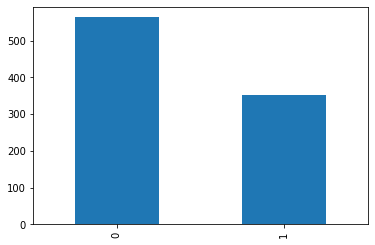

In [4]:
# 생존자 그룹과 비생존자 그룹으로 나누어 feature 그룹 차이 탐색
print(df_train['survived'].value_counts())
df_train['survived'].value_counts().plot.bar()

3    498
1    230
2    188
Name: pclass, dtype: int64


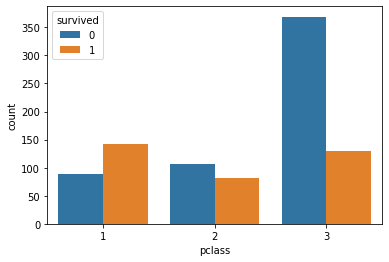

In [5]:
# survived feature를 기준으로 그룹을 나누어 생존자/비생존자 그룹의 생존자 등급(pclass) 분포 확인
print(df_train['pclass'].value_counts())
ax = sns.countplot(x='pclass', hue = 'survived', data = df_train)

In [6]:
from scipy import stats
def valid_features(df, col_name, distribution_check = True):
    # 두 집단의 분포 그래프 출력
    g = sns.FacetGrid(df, col = 'survived')
    g.map(plt.hist, col_name, bins = 30)
    
    # 두 집단의 표준 편차 출력
    titanic_survived = df[df['survived']==1]
    titanic_survived_static = np.array(titanic_survived[col_name])
    print("data std is", '%2f' %np.std(titanic_survived_static))
    titanic_n_survived = df[df['survived']==0]
    titanic_n_survived_static = np.array(titanic_n_survived[col_name])
    print("data std is", '%2f' %np.std(titanic_n_survived_static))
    
    # T-test로 두 집단 평균차이 검정
    tTestResult = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name])
    tTestResultDiffVar = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name], equal_var = False)
    print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." %tTestResult)
    print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f." %tTestResultDiffVar)

data std is 14.217911
data std is 13.710057
The t-statistic and p-value assuming equal variances is -0.546 and 0.585.
The t-statistic and p-value not assuming equal variances is -0.543 and 0.587.


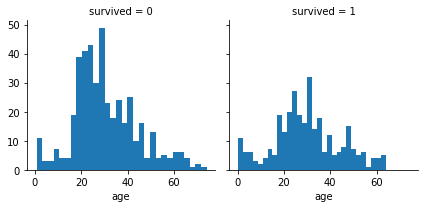

In [7]:
# age feature로 탐색/검정
valid_features(df_train[df_train['age']>0], 'age', distribution_check = True)

data std is 0.644624
data std is 1.337840
The t-statistic and p-value assuming equal variances is -2.118 and 0.034.
The t-statistic and p-value not assuming equal variances is -2.446 and 0.015.


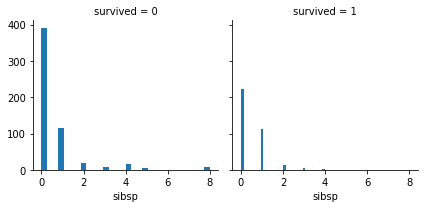

In [8]:
# sibsp feature 탐색/검정
valid_features(df_train, 'sibsp', distribution_check = False)

In [9]:
# 생존자 분류모델 만들기
# step1 데이터 전처리 - 결측값 처리 (여러가지 방법으로 결측값 처리)
# age 결측값 : 평균값으로 대체
replace_mean = df_train[df_train['age']>0]['age'].mean()
df_train['age'] = df_train['age'].fillna(replace_mean)
df_test['age'] = df_test['age'].fillna(replace_mean)

# embark 결측값 : 2개의 결측값을 최빈값으로 대체
embarked_mode = df_train['embarked'].value_counts().index[0]
df_train['embarked'] = df_train['embarked'].fillna(embarked_mode)
df_test['embarked'] = df_test['embarked'].fillna(embarked_mode)

# one-hot encoding을 위한 통합 데이터 프레임(whole_df)을 생성
whole_df = df_train.append(df_test)
train_idx_num = len(df_train)
# pandas패키지를 이용해 one-hot encoding 수행
whole_df_encoded = pd.get_dummies(whole_df)
df_train = whole_df_encoded[:train_idx_num]
df_test = whole_df_encoded[train_idx_num:]
df_train.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,1,0,0,0,1
1,2,1,4.000000,1,1,23.0000,1,0,0,0,1
2,2,1,30.000000,1,0,13.8583,1,0,1,0,0
3,3,0,30.231444,0,0,7.7250,0,1,0,1,0
4,3,1,22.000000,0,0,7.7250,1,0,0,1,0


In [10]:
!pip install scikit-learn

In [11]:
# Scikit-learn 모듈의 Logistic Regression 클래스를 이용한 모델 학습
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 데이터를 train/test dataset으로 분리
x_train, y_train = df_train.loc[: , df_train.columns!='survived'].values, df_train['survived'].values
x_test, y_test = df_test.loc[:, df_test.columns!='survived'].values, df_test['survived'].values

# Logistic Regression Model 학습
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

# 학습한 모델의 test dataset에 대한 예측 결과 반환
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

print(y_pred_probability)

[0.08321232 0.83053814 0.12086697 0.10316504 0.24841063 0.6985773
 0.28677742 0.26362328 0.11143636 0.10269442 0.33244088 0.14040507
 0.32250381 0.68238007 0.92643887 0.25085782 0.62512002 0.47754278
 0.88354172 0.09532784 0.12754364 0.04467181 0.10897052 0.91803042
 0.23015668 0.71857412 0.27990444 0.15046733 0.12668618 0.7073257
 0.85613752 0.96205731 0.81369254 0.30259358 0.77558435 0.1026549
 0.09531723 0.42598237 0.16948651 0.12112087 0.10263102 0.12171219
 0.37233913 0.30823549 0.54682925 0.06022978 0.15223303 0.91470376
 0.33630411 0.10273854 0.84302883 0.10267788 0.12110777 0.62792285
 0.11491396 0.10268982 0.90064271 0.4358023  0.7057723  0.90561328
 0.1345381  0.30541923 0.49665178 0.22491536 0.54868438 0.78683327
 0.2512329  0.16948651 0.13096036 0.72994179 0.79768454 0.09024137
 0.40650038 0.05801572 0.65236834 0.93997283 0.28595444 0.88697765
 0.56686339 0.12600357 0.36928905 0.76033377 0.2136955  0.3246752
 0.47718198 0.94434904 0.11758382 0.06486467 0.21614899 0.10630697

In [12]:
# test dataset에 대한 accuracy, precision, recall, f1 평가 지표 출력
print("accuracy: %.2f" %accuracy_score(y_test, y_pred))
print("Precision : %.3f" %precision_score(y_test, y_pred))
print("Recall : %.3f" %recall_score(y_test, y_pred))
print("F1 : %.3f" %f1_score(y_test, y_pred))

accuracy: 0.80
Precision : 0.756
Recall : 0.673
F1 : 0.712


In [13]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(confmat)

[[214  32]
 [ 48  99]]


In [14]:
# sklearn.metrics.confusion_matrix()
from sklearn.metrics import confusion_matrix
answer = [1,1,0,1,0,0,1,0,0,0]
predicted = [1,0,0,1,0,0,1,1,1,0]
results = confusion_matrix(y_true = answer, y_pred = predicted)
print(results)

[[4 2]
 [1 3]]


In [15]:
# back to the confusion matrix of titanic survivor model
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(confmat)
# True Positive : 99
# True Negative : 214
# False Positive : 32
# False Negative : 48

[[214  32]
 [ 48  99]]


In [16]:
# 다양한 학습 분류 모델 평가

In [17]:
# 1) Precision : 모델이 True라고 분류한 것 중 실제 True 비율
# 즉, PPV = TP / (TP+FP)

In [18]:
# 2) Recall : 모델이 찾은 True의 coverage
# TPR = TP / P = TP/(TP+FN)
# 실제로 positive 중에 true positive 인 것 비율

In [19]:
# 3) Accuracy : True Positive + True Negative => True
# ACC = (TP+TN) / P+N

In [20]:
# 4) F1-score : Harmonic Mean of Precision & Recall
# Precision과 Recall이 trade-off 관계이기 때문에 조화평균으로 둘의 평균
# F1 = 2* PPV*TPR/ PPV+TPR

In [21]:
# 5) Fall-out :  False인 data 중에서 학습으로 True라고 예측한 비율 -> 낮을수록 좋다
# FPR = FP / N = FP/ (FP+TN)

In [22]:
# 6) ROC Curve
# 여러 임계값을 기준으로 Recall-Fallout의 변화를 시각화한것.
# y=x 그래프를 기준으로 상단에 위치할수록 (왼쪽 위 모서리에 가까울수록),
# Recall이 크고 Fall-out이 작아질 수록 분류 모델 성능이 좋아짐
# 이때 ROC curve 자체는 graph이기 때문에 수치적인지표로 확인하기 위해
# AUC 라는 지표(ROC-curve 의 아래 면적. 최대값 : 1) -> 1에 가까울수록 성능 좋은 모델

AUC : 0.838


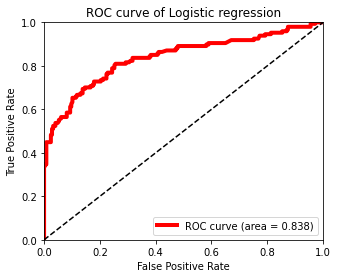

In [23]:
# Titanic 생존자 분류 모델 AUC 출력
from sklearn.metrics import roc_curve, roc_auc_score

#AUC (Area Under the curve) 계산하여 출력
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" %roc_auc)

#ROC curve 그래프로 출력
plt.rcParams['figure.figsize'] = [5,4]
plt.plot(false_positive_rate, true_positive_rate, label = "ROC curve (area = %0.3f)" %roc_auc,
         color= 'red', linewidth =4.0)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve of Logistic regression")
plt.legend(loc = 'lower right')

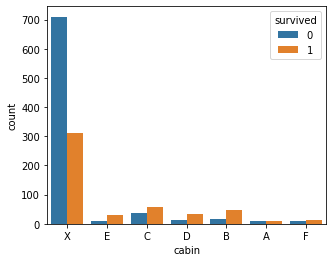

In [24]:
# 데이터 분류 모델 성능 개선!
# step1. 데이터 전처리
df_train = pd.read_csv("titanic_train.csv")
df_test = pd.read_csv("titanic_test.csv")
df_train = df_train.drop(['ticket', 'body','home.dest'], axis = 1)
df_test = df_test.drop(['ticket', 'body','home.dest'], axis = 1) #name, cabin을 생존자 분류 모델에 한번 추가해보겠다.

# age 결측값 : 평균값으로 대체
replace_mean = df_train[df_train['age']>0]['age'].mean()
df_train['age'] = df_train['age'].fillna(replace_mean)
df_test['age'] = df_test['age'].fillna(replace_mean)

# embark 결측값 : 2개의 결측값을 최빈값으로 대체
embarked_mode = df_train['embarked'].value_counts().index[0]
df_train['embarked'] = df_train['embarked'].fillna(embarked_mode)
df_test['embarked'] = df_test['embarked'].fillna(embarked_mode)

# one-hot encoding을 위한 통합 데이터 프레임(whole_df)을 생성
whole_df = df_train.append(df_test)
train_idx_num = len(df_train)

# cabin 결측값 처리
whole_df['cabin'] = whole_df['cabin'].fillna('X')
# cabin의 첫 문자 추출
whole_df['cabin'] = whole_df['cabin'].apply(lambda x: x[0])
# 추출 문자 중 G, T는 너무 작아서 'X'로 대체
whole_df['cabin'] = whole_df['cabin'].replace({"G":"X", "T":"X"})

ax = sns.countplot(x = 'cabin', hue = 'survived', data = whole_df)
plt.show()
# cabin feature 또한 두 그룹간의 유의미한 차이가 있는 것으로 판단 -> 분류모델에 포함해보자.

In [25]:
# name feature 활용
# 이름에서 호칭 추출 (전처리)
name_grade = whole_df['name'].apply(lambda x : x.split(", ", 1)[1].split(".")[0])
name_grade = name_grade.unique().tolist()
print(name_grade)

['Miss', 'Mr', 'Master', 'Mrs', 'Dr', 'Mlle', 'Col', 'Rev', 'Ms', 'Mme', 'Sir', 'the Countess', 'Dona', 'Jonkheer', 'Lady', 'Major', 'Don', 'Capt']


In [26]:
# 호칭에 따라 사회적 지위를 정의 -> categorical feature로 정의
grade_dict = {
    'A' : ['Rev', 'Col', 'Major', 'Dr', 'Capt', 'Sir'], #명예직
    'B' : ['Ms', "Mme","Mrs", 'Dona'], #여성
    'C' : ['Jonkheer', 'the Countess'], #귀족, 작위
    'D' : ['Mr', 'Don'], #남성
    'E' : ['Master'], #젊은 남성
    'F' : ['Miss', 'Mile', 'Lady'] #젊은 여성
}

#정의한 호칭 카테고리에 따라 A~F의 문자로 name feature 재정의
def give_grade(x):
    grade = x.split(", ", 1)[1].split(".")[0]
    for key, value in grade_dict.items():
        for title in value:
            if grade == title:
                return key
    return 'G'

# 위의 함수를 적용해 name feature를 새롭게 정의
whole_df['name'] = whole_df['name'].apply(lambda x : give_grade(x))
print(whole_df['name'].value_counts())

D    758
F    261
B    201
E     61
A     24
G      2
C      2
Name: name, dtype: int64


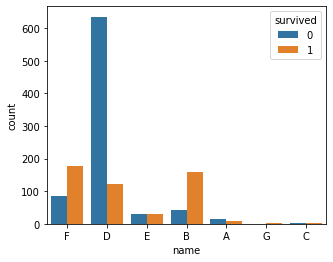

In [27]:
ax = sns.countplot(x = 'name', hue = 'survived', data = whole_df)
plt.show()
#이번에도 plotting을 해보니 name feature 역시 생존/비생존자 그룹 간 분포의 유의미한 차이 있는 것 판단

In [28]:
# One-hot encoding
whole_df_encoded = pd.get_dummies(whole_df)
df_train = whole_df_encoded[:train_idx_num]
df_test = whole_df_encoded[train_idx_num:]
df_train.head()

,pclass,survived,age,sibsp,parch,fare,name_A,name_B,name_C,name_D,...,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_X,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2,1,4.000000,1,1,23.0000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2,1,30.000000,1,0,13.8583,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,3,0,30.231444,0,0,7.7250,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4,3,1,22.000000,0,0,7.7250,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [29]:
# Feature Engineering 이후 dataset 학습
# 데이터를 train/test dataset으로 분리
x_train, y_train = df_train.loc[: , df_train.columns!='survived'].values, df_train['survived'].values
x_test, y_test = df_test.loc[:, df_test.columns!='survived'].values, df_test['survived'].values

# Logistic Regression Model 학습
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

# 학습한 모델의 test dataset에 대한 예측 결과 반환
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]


print(y_pred_probability)

[0.07896093 0.74349627 0.08218346 0.09291669 0.17111803 0.59341491
 0.43193844 0.42376352 0.09240554 0.09129653 0.22702961 0.08965747
 0.67596161 0.67313893 0.94513347 0.16505508 0.61350115 0.45706584
 0.87703881 0.08671678 0.1059189  0.16675127 0.09506436 0.92580808
 0.64454417 0.75633744 0.17954936 0.13162251 0.10468725 0.6894896
 0.79460987 0.96934707 0.90866142 0.21675581 0.92113711 0.09116136
 0.08667974 0.25950105 0.14285867 0.10235115 0.09107971 0.10118122
 0.48686136 0.66836102 0.52455499 0.2339632  0.13228053 0.96599157
 0.7620872  0.09144763 0.78374089 0.09123992 0.10230819 0.54566893
 0.09867427 0.0912808  0.95493783 0.53590941 0.68222749 0.8582709
 0.11050189 0.6837269  0.30674345 0.63987134 0.33781819 0.65135862
 0.16610279 0.14285867 0.10805744 0.69967814 0.74642664 0.08331731
 0.52459784 0.06172424 0.64488445 0.97005827 0.18256472 0.89233522
 0.53598476 0.10250429 0.22656047 0.73003097 0.1463597  0.46189318
 0.42354165 0.91487854 0.07279162 0.06651251 0.14434484 0.104224

In [30]:
# 평가 지표 출력
print("accuracy: %.2f" %accuracy_score(y_test, y_pred))
print("Precision : %.3f" %precision_score(y_test, y_pred))
print("Recall : %.3f" %recall_score(y_test, y_pred))
print("F1 : %.3f" %f1_score(y_test, y_pred))

# AUC 계산
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" %roc_auc)

# Feature 추가하기 전과 후에 봤을때 Accuracy는 조금 줄었고
# Precision은 감소, 그와 trade-off 있는 Recall은 증가
# AUC가 증가. => 전반적인 모델 성능 향상 있었다!

accuracy: 0.80
Precision : 0.739
Recall : 0.714
F1 : 0.727
AUC : 0.853


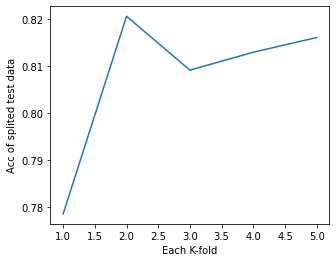

In [31]:
# 분류모델 검증 -> Overfitting 검증!!!
# 1) K-folds cross validation
from sklearn.model_selection import KFold

# K-fold 교차 검증의 k를 5로 설정
k = 5
cv = KFold(k, shuffle = True, random_state =0)
acc_history = []

# K- fold를 5번의 분할 학습으로 반복
for i, (train_data_row, test_data_row) in enumerate(cv.split(whole_df_encoded)):
    # 5개로 분할된 fold 중 4개를 학습 데이터 셋, 1개를 test dataset으로 지정
    # 매 반복시마다 테스트 데이터 셋은 변경된다..
    df_train = whole_df_encoded.iloc[train_data_row]
    df_test = whole_df_encoded.iloc[test_data_row]
    
    # survived feature 를 y, 나머지 feature를 x데이터로 지정
    splited_x_train, splited_y_train = df_train.loc[:, df_train.columns!='survived'].values, df_train['survived'].values
    splited_x_test, splited_y_test = df_test.loc[:, df_test.columns!='survived'].values, df_test['survived'].values
    
    #주어진 데이터로 logistic regression 학습
    lr = LogisticRegression(random_state=0)
    lr.fit(splited_x_train, splited_y_train)
    y_pred = lr.predict(splited_x_test)
    
    # test dataset의 accuracy 계산 -> acc_history에 저장
    splited_acc = accuracy_score(splited_y_test, y_pred)
    acc_history.append(splited_acc)

#acc_history에 저장된 5번의 학습결과 (Accuracy)를 그래프로 출력
plt.xlabel("Each K-fold")
plt.ylabel("Acc of splited test data")
plt.plot(range(1,k+1), acc_history)

In [32]:
# 2) Learning Curve 분석을 통해 overfitting 검증
!pip install scikit-plot

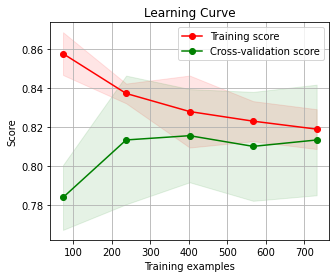

In [33]:
# Learning curve graph 출력
import scikitplot as skplt
skplt.estimators.plot_learning_curve(lr, x_train, y_train)
plt.show()

In [34]:
# 위의 Learning curve를 통해,
# training score와 cross-validation score의 차이가 클때 : overfitting
# ex) training set의 크기가 400개 이상인 경우 : overfitting의 위험이 낮아지고 있다..